## Function Overview: `filter_dataset`

This function filters image and mask datasets by retaining all patches with non-black masks and a specified percentage of fully black masks. It is designed to balance the dataset for better training results in machine learning tasks.

### Key Steps:
1. **Directory Setup**:
   - Reads images and masks from `train` and `val` folders in the `base_dir`.
   - Creates corresponding output directories in `output_base_dir`.

2. **Mask Classification**:
   - Masks are classified as:
     - **Black Masks**: Contain no non-zero pixels (completely black).
     - **Non-Black Masks**: Contain at least one non-zero pixel.

3. **Black Mask Sampling**:
   - Retains a fraction (`keep_black_ratio`) of black masks, ensuring a balanced dataset.

4. **Filtering and Saving**:
   - Copies selected masks and their corresponding images to the output directory.
   - Ensures valid files are saved and logs warnings for issues like unreadable or empty files.

5. **Validation**:
   - Verifies that saved masks are in the correct format.

### Output:
- Filtered datasets are saved to `output_base_dir` with the following structure:


In [3]:
import os
import cv2
import random
from tqdm import tqdm
# define function to filter dataset
def filter_dataset(base_dir, output_base_dir, keep_black_ratio):
    """
    Filters patches to retain all containing roots and a percentage of fully black masks.

    Parameters:
        base_dir (str): Base directory containing train and val folders.
        output_base_dir (str): Base directory to save filtered train and val folders.
        keep_black_ratio (float): Ratio of fully black masks to keep (0 to 1).
    """
    # for loop to iterate over train and val folders
    for split in ['train', 'val']:
        # define paths for images and masks
        images_dir = os.path.join(base_dir, f"{split}_images", split)
        masks_dir = os.path.join(base_dir, f"{split}_masks", split)
        # define paths for output images and masks
        output_images_dir = os.path.join(output_base_dir, f"{split}_images", split)
        output_masks_dir = os.path.join(output_base_dir, f"{split}_masks", split)
        # create directories
        os.makedirs(output_images_dir, exist_ok=True)
        os.makedirs(output_masks_dir, exist_ok=True)
        # define mask files
        mask_files = [f for f in os.listdir(masks_dir) if f.endswith('.png')]
        black_masks = []
        non_black_masks = []
        # fp loop to iterate over mask files
        for mask_file in tqdm(mask_files, desc=f"Classifying masks in {split}"):
            mask_path = os.path.join(masks_dir, mask_file)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            # if mask is none, print warning and continue
            if mask is None:
                print(f"Warning: Could not load mask {mask_path}. Skipping.")
                continue
            # if mask is fully black, add to black_masks
            if cv2.countNonZero(mask) == 0:
                black_masks.append(mask_file)
            else:
                non_black_masks.append(mask_file)
        # define number of black masks to keep
        num_black_to_keep = int(len(black_masks) * keep_black_ratio)
        black_masks_to_keep = random.sample(black_masks, num_black_to_keep)
        # define selected masks
        selected_masks = set(black_masks_to_keep + non_black_masks)
        # fp loop to iterate over selected masks
        for mask_file in tqdm(selected_masks, desc=f"Saving filtered patches in {split}"):
            # define paths for masks and images
            mask_path = os.path.join(masks_dir, mask_file)
            image_path = os.path.join(images_dir, mask_file)
            # define output paths for masks and images
            output_mask_path = os.path.join(output_masks_dir, mask_file)
            output_image_path = os.path.join(output_images_dir, mask_file)
            # load mask and image
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.imread(image_path)
            # if mask or image is none, print warning and continue
            if mask is None or image is None:
                print(f"Warning: Failed to load file pair: {image_path}, {mask_path}. Skipping.")
                continue
            # if mask or image is empty, print warning and continue
            if mask.size == 0 or image.size == 0:
                print(f"Warning: Empty file detected: {image_path}, {mask_path}. Skipping.")
                continue
            # save mask and image
            cv2.imwrite(output_mask_path, mask)
            cv2.imwrite(output_image_path, image)

            # Validation step
            saved_mask = cv2.imread(output_mask_path, cv2.IMREAD_GRAYSCALE)
            if saved_mask is None or saved_mask.dtype != "uint8":
                print(f"Error: Invalid saved mask: {output_mask_path}")

# Usage
base_dir = "Y2B_24_23_patched"
output_base_dir = "Y2B_24_23_filtered_16"

filter_dataset(base_dir, output_base_dir, keep_black_ratio=0)


Saving filtered patches in val: 100%|██████████| 1042/1042 [00:08<00:00, 128.61it/s]


### Check whether the images and the patch match

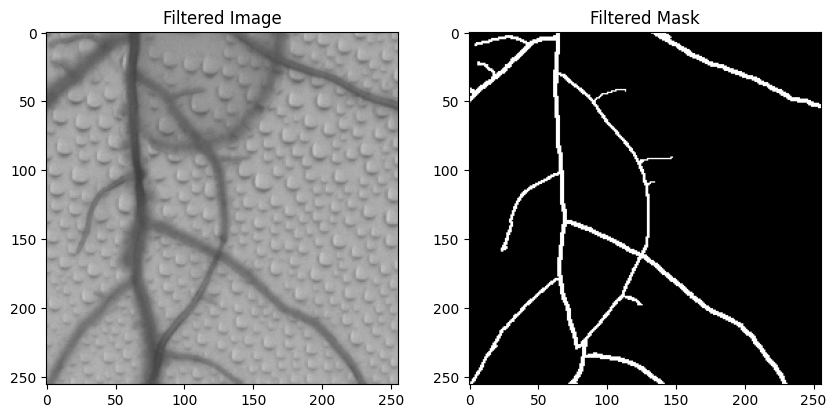

(256, 256, 3)


In [12]:
import matplotlib.pyplot as plt
import cv2
# Example to visualize a patch
patch_image_path = "Y2B_24_23_filtered_4/train_images/train/train_Alican_230858_im3_512_1792.png"
patch_mask_path = "Y2B_24_23_filtered_4/train_masks/train/train_Alican_230858_im3_512_1792.png"

mask = cv2.imread(patch_mask_path, cv2.IMREAD_GRAYSCALE)
image = cv2.imread(patch_image_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Filtered Image")
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="gray")
plt.title("Filtered Mask")
plt.show()
print(image.shape)